[ 3.59838396 -1.47886238 -3.82091641  0.99412257]


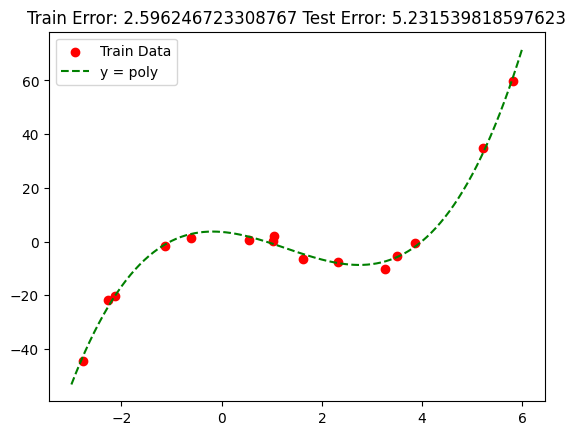

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Calculates the polynomial
def y(x,w):
    new_y = 0
    for i in range(len(w)):
        new_y += w[i]*x**i
    return new_y

# Calculates the MSE (Mean Square Error)
def mse(x,t,w):
     return (t-x@w).T @ (t-x@w) / len(t)

# Calculates the coefficients according to the training data
def calc_w(x,t,lamda=0):
    mat = np.linalg.inv(x.T @ x + lamda*np.eye(x.shape[1])) @ x.T @ t
    return mat

# Creates a matrix for the training data with each column raised to the power of its index
def create_matrix(x,dim):
    new_x = np.ones((len(x), dim+1))
    for dim in range(1,dim+1):
        new_x[:,dim] = x**dim
    return new_x

# Loading the data
x_train = pd.read_csv("PolynomialRegressionExercice_TRAIN_DATA.txt")['# x'].values
t_train= pd.read_csv("PolynomialRegressionExercice_TRAIN_DATA.txt")['t'].values
x_test = pd.read_csv("PolynomialRegressionExercice_TEST_DATA.txt")['# x'].values
t_test= pd.read_csv("PolynomialRegressionExercice_TEST_DATA.txt")['t'].values

# Full Training

dim = 3

# Calculating the coefficients using the created x matrix
new_x_train = create_matrix(x_train,dim)
w = calc_w(new_x_train,t_train)

# Preparing the data for the plot
x_grid = np.linspace(-3,6,100)
new_x_grid = create_matrix(x_grid,dim)
t_grid = new_x_grid @ w

print(w)

# Calculating the MSE for the train and test data
new_x_test = create_matrix(x_test,dim)
train_err = mse(new_x_train,t_train,w)
test_err = mse(new_x_test,t_test,w)

plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.plot(x_grid,t_grid, color='green', linestyle='--', label="y = poly")
plt.title(f'Train Error: {train_err} Test Error: {test_err}')
plt.legend()
plt.show()


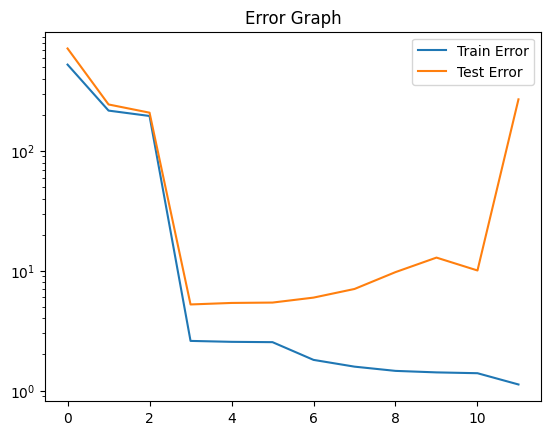

In [6]:
# Finding the optimal order for the Polynomial Regressor
train_err = []
test_err = []
w_by_order = []

for i in range(12):
    new_x_train = create_matrix(x_train,i)
    new_x_test = create_matrix(x_test,i)
    w = calc_w(new_x_train,t_train)
    w_by_order.append(w)
    train_err.append(mse(new_x_train,t_train,w))
    test_err.append(mse(new_x_test,t_test,w))

x = np.linspace(0,11,12)

# Prints for the data

# for i in range(len(train_err)):
#     print(f'{i} Order Train Error: {train_err[i]}')

# for i in range(len(test_err)):
#     print(f'{i} Order Test Error: {test_err[i]}')

# for i in range(len(w_by_order)):
#     print(f'{i} Order Coefficients: {w_by_order[i]}')

plt.plot(x,train_err, label="Train Error")
plt.plot(x,test_err, label="Test Error")
plt.title('Error Graph')
plt.yscale('log')
plt.legend()


[1.00000000e-04 4.28133240e-04 1.83298071e-03 7.84759970e-03
 3.35981829e-02 1.43844989e-01 6.15848211e-01 2.63665090e+00
 1.12883789e+01 4.83293024e+01 2.06913808e+02 8.85866790e+02
 3.79269019e+03 1.62377674e+04 6.95192796e+04 2.97635144e+05
 1.27427499e+06 5.45559478e+06 2.33572147e+07 1.00000000e+08]


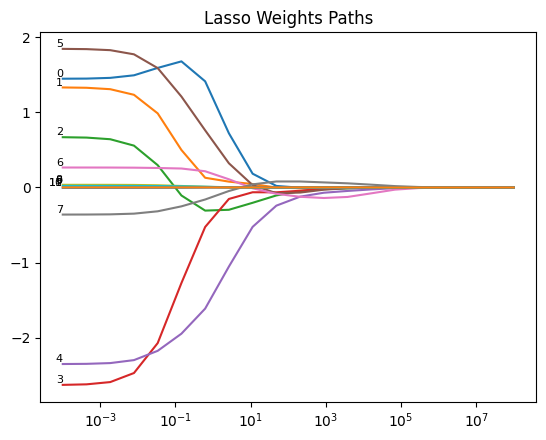

In [7]:
# Plotting the value of the trained coefficients for each order and for each lambda value
lamda = np.logspace(-4,8,20)
w = []
order = 11
new_x_train = create_matrix(x_train, order)
for i in range(len(lamda)):
    w.append(calc_w(new_x_train,t_train,lamda[i]))

for i in range(len(w[0])):
    col = [row[i] for row in w]
    plt.plot(lamda, col)
    plt.text(lamda[0], col[0], i, fontsize=8, verticalalignment='bottom', horizontalalignment='right')
    plt.title('Lasso Weights Paths')
    plt.xscale('log')

print(lamda)

Initial w: [0.72995936 0.50416586 0.7456263  0.31141586]
Final w: [ 3.58139749 -1.47641198 -3.8182316   0.99365342]
Iterations: 93661


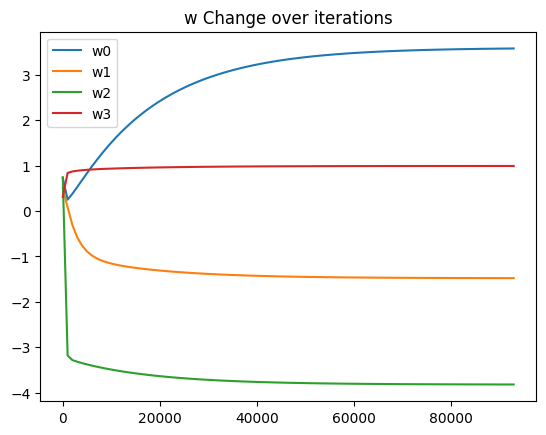

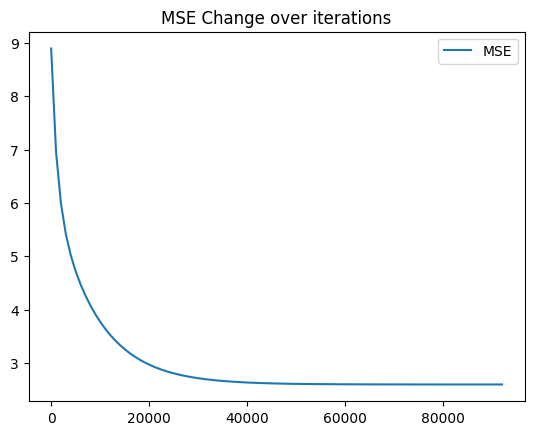

In [8]:
# Trains a Polynomial Regressor using gradient descent
def gradientDescent(x_train,t_train,alpha,degree,sample_freq):
    x_train = create_matrix(x_train, degree)
    w = np.random.rand(x_train.shape[1])
    initial_w = w.copy()
    prev_w = None
    w_history = [[] for _ in range(x_train.shape[1])]

    for i in range(4):
        w_history[i].append(w[i])

    mse_history = []
    iteration = 0
    while True:
        iteration += 1
        prev_w = w.copy()
        gradient = (alpha * 2 * x_train.T / len(x_train)) @ (x_train @ w - t_train)
        w = w - gradient

        if(iteration%sample_freq == 0):
            for i in range(4):
                w_history[i].append(w[i])
            mse_history.append(mse(x_train,t_train,w))
                
        if np.linalg.norm(w - prev_w) < 10**-6:
            return w, initial_w, iteration, w_history, mse_history
        
sample_freq = 1000
optimal_order = 3
alpha = 0.0001
w1,initial_w1,iteration1,w_history,mse_history = gradientDescent(x_train, t_train, alpha, optimal_order, sample_freq)

print(f'Initial w: {initial_w1}')
print(f'Final w: {w1}')
print(f'Iterations: {iteration1}')

x = [i * sample_freq for i in range(len(w_history[0]))]

for i in range(len(w_history)):
    plt.plot(x,w_history[i], label=f"w{i}")

plt.title('w Change over iterations')
plt.legend()
plt.figure()

x = [i * sample_freq for i in range(len(mse_history))]

plt.plot(x,mse_history, label="MSE")
plt.title('MSE Change over iterations')
plt.legend()